<a href="https://colab.research.google.com/github/Ajay7545/EEGClassification/blob/master/1LSTM_for_Reg_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:

from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [0]:
data_nov = read_csv('drive/My Drive/COLAB Files/data_Nov_New_withZERO.csv')
#print(data_nov)
data_dec_jan = read_csv('drive/My Drive/COLAB Files/data_Dec_Jan_withZERO.csv')
data_feb = read_csv('drive/My Drive/COLAB Files/data_Feb2018_withZERO.csv')
data_mar_apr = read_csv('drive/My Drive/COLAB Files/Data_March_Apr_withZERO.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
dataframe = pd.DataFrame(data_nov)
print(dataframe.shape)
dataframe.head(2)

(42855, 118)


,Date,Time,A (Current average),"A1 (Current, phase 1)","A2 (Current, phase 2)","A3 (Current, phase 3)",VLL (Line to line average voltage),VLN (Line to neutral voltage),V12 (Voltage phase 1 to phase 2),V23 (Voltage phase 2 to phase 3),V31 (Voltage phase 3 to phase 1),V1 (Voltage phase 1 to neutral),V2 (Voltage phase 2 to neutral),V3 (Voltage phase 3 to neutral),"W (Active power, total)","W1 (Active power, phase 1)","W2 (Active power, phase 2)","W3 (Active power, phase 3)","VAR (Reactive power, total)","VAR1 (Reactive power, phase 1)","VAR2 (Reactive power, phase 2)","VAR3 (Reactive power, phase3)","VA (Apparent power, total)","VA1 (Apparent power, phase 1)","VA2 (Apparent power, phase 2)","VA3 (Apparent power,phase 3)",PF (Power factor average),"PF1 (Power factor, phase 1)","PF2 (Power factor, phase 2)","PF3 (Power factor, phase 3)","F (Frequency, Hz)","\%V1 (Voltage THD, phase 1)","\%V2 (Voltage THD, phase 2)","\%V3 (Voltage THD, phase 3)","\%A1 (Current THD, phase 1)","\%A2 (Current THD, phase 2)","\%A3 (Current THD, phase 3)",FwdVAh (Forward apparent energy),FwdWh (Forward active energy),FwdVARh (Forward reactive inductive energy),...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117
0,01-11-2017,00:00:07,28.3969,30.589,29.8629,24.7389,11416.9,6591.72,11432.4,11504.2,11314.0,6550.82,6632.08,6592.27,546826.0,192451.0,196255.0,158120.0,72644.9,45589.1,1.499970e-14,25413.6,560518.0,200443.0,198154.0,163068.0,0.975996,0.960801,0.990914,0.969679,50.0967,3.61206,3.42159,3.16277,-999.0,-999.0,-999.0,4.240800e+09,4.186590e+09,321568000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-11-2017,00:01:07,28.4445,30.316,30.1737,24.8438,11415.0,6590.64,11426.1,11506.1,11312.8,6545.46,6630.32,6594.48,546338.0,188518.0,198005.0,159814.0,102569.0,54501.3,1.545230e+04,32615.6,560627.0,198396.0,199956.0,163838.0,0.974511,0.950213,0.990245,0.975438,50.1141,3.31410,3.64733,2.97238,-999.0,-999.0,-999.0,4.240810e+09,4.186590e+09,321569000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataframe = dataframe.append(data_dec_jan, ignore_index=True)
#print(dataframe.Time)
dataframe = dataframe.append(data_feb, ignore_index=True)
dataframe = dataframe.append(data_mar_apr, ignore_index=True)
print(len(dataframe))
dataframe = dataframe.dropna(subset=['Date','Time','W (Active power, total)']) 
print(len(dataframe.Date))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


259924
259640


In [0]:


data_novtemp = read_csv('drive/My Drive/COLAB Files/data_Nov_New_withZERO.csv')
dt=pd.DataFrame(data_novtemp)
dtemp=pd.DataFrame()
y1=dt['Date']
y2=dt['Time']
y3=dt['W (Active power, total)']

dtemp['Date']=y1
dtemp['Time']=y2
dtemp['W (Active power, total)']=y3
print(dtemp.head(5))

j=0
total=0
for i in dtemp['W (Active power, total)']:
  if i==0 or i==0.0:
    total=total+1
    print(j,'Index value is',i)
  j=j+1
  

print("Total 0's are:",total)
  

In [0]:
import pandas as pd
d1=pd.DataFrame()
y1=dataframe['Date']
y2=dataframe['Time']
y3=dataframe['W (Active power, total)']

d1['Date']=y1
d1['Time']=y2
d1['W (Active power, total)']=y3
d1.head(5)


,Date,Time,"W (Active power, total)"
0,01-11-2017,00:00:07,546826.0
1,01-11-2017,00:01:07,546338.0
2,01-11-2017,00:02:07,544612.0
3,01-11-2017,00:03:07,557498.0
4,01-11-2017,00:04:07,550845.0


In [0]:
j=0
total=0
for i in d1['W (Active power, total)']:
  if i==0:
    total=total+1
    #print(j,'Index',i)
  j=j+1
  
print("Total 0 are:",total)
  

Total 0 are: 15185


In [0]:
d1.dropna()
d1.shape

(259924, 3)

In [0]:
def mmddyyyy(x):
    length = len(x)
    if(length>10):
        #print(x)
        x=x[length-10:length]
        #print(x)
    if type(x) == str and len(x) == 10:
        return x[3:6]+x[0:3]+x[6:]
    else:
        return x

In [0]:
dataframe['DateTime'] = pd.to_datetime(dataframe.Date.apply(mmddyyyy) + ' ' + dataframe.Time)
df_withdatetime_and_w = dataframe[["DateTime","W (Active power, total)"]]
df_withdatetime_and_w = df_withdatetime_and_w.drop_duplicates()
print(df_withdatetime_and_w)

                  DateTime  W (Active power, total)
0      2017-11-01 00:00:07                 546826.0
1      2017-11-01 00:01:07                 546338.0
2      2017-11-01 00:02:07                 544612.0
3      2017-11-01 00:03:07                 557498.0
4      2017-11-01 00:04:07                 550845.0
5      2017-11-01 00:05:07                 527869.0
6      2017-11-01 00:06:07                 527455.0
7      2017-11-01 00:07:07                 531229.0
8      2017-11-01 00:08:07                 529040.0
9      2017-11-01 00:09:07                 535585.0
10     2017-11-01 00:10:07                 539585.0
11     2017-11-01 00:11:07                 529016.0
12     2017-11-01 00:12:07                 526187.0
13     2017-11-01 00:13:07                 531446.0
14     2017-11-01 00:14:07                 536260.0
15     2017-11-01 00:15:07                 552100.0
16     2017-11-01 00:16:07                 539402.0
17     2017-11-01 00:17:07                 522341.0
18     2017-

In [0]:
#convert data to hourly data
months = ['2017-11-','2017-12-','2018-01-','2018-02-','2018-03-','2018-04-']
num_days_list = [30, 31, 31,28,31,30]
li_x = []
li_y = []
df_withdatetime_and_w.index = df_withdatetime_and_w['DateTime']
#print(df_withdatetime_and_w)
for i, month in enumerate(months):
    for day in range(1, num_days_list[i] + 1):
        date = month + "%02d"%(day)
        for hr in range(24):
            hr_str = date + " " + "%02d"%(hr)
            li_x.append(hr_str)
            li_y.append(df_withdatetime_and_w[hr_str]['W (Active power, total)'].mean()) #hourly mean of W
            
            #print(i, date)
print(len(li_y))#the length is number of total days * 24 as this is hourly data
print(li_y)
print(li_x)


4344
[519597.7833333333, 498347.4576271186, 484304.2833333333, 466379.6666666667, 485671.56666666665, 0.0, 0.0, 0.0, 508465.13333333336, 721912.7118644068, 793448.25, 770637.85, 829036.2166666667, 772772.4, 739610.2833333333, 782929.5254237289, 729529.5333333333, 707244.05, 683959.2166666667, 650222.4915254237, 627707.3166666667, 606695.1833333333, 590271.85, 543409.6779661017, 515774.86440677964, 491180.7, 477839.0833333333, 467708.22033898305, 473156.31666666665, 457869.9666666667, 415218.51666666666, 0.0, 0.0, 0.0, 720449.2647058824, 711119.3166666667, 679552.5166666667, 652792.9333333333, 695944.9491525424, 729301.8, 702442.5833333334, 699519.9333333333, 677462.8833333333, 622357.8305084746, 577002.35, 597025.4833333333, 595300.0166666667, 518786.25423728814, 493680.4576271186, 479874.1666666667, 458952.3333333333, 445641.0677966102, 460902.93333333335, 434340.2, 399242.01666666666, 416652.5593220339, 499486.4, 8505.766666666666, 0.0, 0.0, 758133.2833333333, 735425.4666666667, 7684

In [0]:
# create dataframe of hourly data
df_hourly = pd.DataFrame(li_y)
df_hourly['W'] =li_y

In [0]:
import math
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
df_hourly.dropna()
df_hourly['W'].dropna()
dataset = df_hourly['W'].values
print(dataset)
dataset =[0 if math.isnan(x) else x for x in dataset]
df = pd.DataFrame(dataset)
df.dropna()
dataset = df.values
dataset = dataset.reshape((len(dataset), 1))
print(dataset)
#dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

[519597.78333333 498347.45762712 484304.28333333 ...      0.
      0.              0.        ]
[[519597.78333333]
 [498347.45762712]
 [484304.28333333]
 ...
 [     0.        ]
 [     0.        ]
 [     0.        ]]


In [0]:
print(len(dataset))

4344


In [0]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# reshape into X=t and Y=t+1
look_back =4
print(len(dataset))
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(train),len(trainX))
print(len(test),len(testX))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#print(testX[0])
dataset.shape

4344
3040 3035
1304 1299


(4344, 1)

In [100]:
trainY.shape

(3035,)

In [0]:
testX

array([[[0.49482076, 0.43715618, 0.46522131, 0.45955172]],

       [[0.43715618, 0.46522131, 0.45955172, 0.42984996]],

       [[0.46522131, 0.45955172, 0.42984996, 0.41477892]],

       ...,

       [[0.58300661, 0.51080553, 0.55604679, 0.57965332]],

       [[0.51080553, 0.55604679, 0.57965332, 0.55532497]],

       [[0.55604679, 0.57965332, 0.55532497, 0.        ]]])

In [0]:
testY

array([0.42984996, 0.41477892, 0.39805374, ..., 0.55532497, 0.        ,
       0.        ])

In [0]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()
        
plot_losses = PlotLosses()

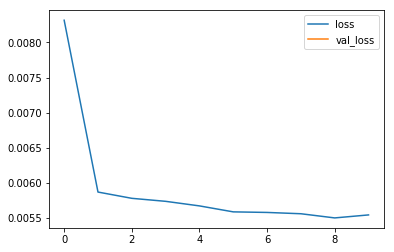

In [0]:
model = Sequential()
model.add(LSTM(50, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, callbacks=[plot_losses], batch_size=1)

In [0]:
# make predictions
trainPredict = model.predict_on_batch(trainX)
testPredict = model.predict(testX)
print(len(trainPredict))
print(len(trainX))
print(trainX[0])
print(trainPredict[0])

3035
3035
[[0.35335622 0.33890479 0.32935462 0.31716486]]
[0.2929972]


In [0]:
trainX.shape

(3035, 1, 4)

In [0]:
len(testPredict)

1299

In [0]:
#import pandas as pd
#xt1=pd.DataFrame(trainX)
#xt1.head()

In [0]:
trainX[:10]

array([[[0.35335622, 0.33890479, 0.32935462, 0.31716486]],

       [[0.33890479, 0.32935462, 0.31716486, 0.33028446]],

       [[0.32935462, 0.31716486, 0.33028446, 0.        ]],

       [[0.31716486, 0.33028446, 0.        , 0.        ]],

       [[0.33028446, 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.34578539]],

       [[0.        , 0.        , 0.34578539, 0.49094195]],

       [[0.        , 0.34578539, 0.49094195, 0.53959021]],

       [[0.34578539, 0.49094195, 0.53959021, 0.52407783]],

       [[0.49094195, 0.53959021, 0.52407783, 0.56379206]]])

In [0]:
t1=trainX[:,0]
t1

array([[0.35335622, 0.33890479, 0.32935462, 0.31716486],
       [0.33890479, 0.32935462, 0.31716486, 0.33028446],
       [0.32935462, 0.31716486, 0.33028446, 0.        ],
       ...,
       [0.34942064, 0.42232193, 0.48013166, 0.47534929],
       [0.42232193, 0.48013166, 0.47534929, 0.44500443],
       [0.48013166, 0.47534929, 0.44500443, 0.41357614]])

In [0]:
import numpy as np
a=np.arange(1,13)
a=a.reshape(4,3)
print(a)
a=a.reshape(12)
a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [0]:
t1[:,0].shape


(3035,)

In [0]:
xtr1=[]
for i in t1[:,0]:
  if i==0:
    xtr1.append(0)
  else:
    xtr1.append(1)
len(xtr1)


3035

In [0]:
#xall=[]
#type(xall)
#for i in trainX:
#  xall.append(i)
#len(xall)
testX.shape
#t2=testX.reshape(5196) #1299*4
t2=testX[:,0]

In [0]:
xts1=[]
for i in t2[:,0]:
  if i==0:
    xts1.append(0)
  else:
    xts1.append(1)
len(xts1)

1299

In [0]:
print(len(trainPredict))
print(len(testPredict))
print(trainPredict.shape)
print(testPredict.shape)
tp1=trainPredict.reshape(3035)
tp2=testPredict.reshape(1299)

3035
1299
(3035, 1)
(1299, 1)


In [0]:
tnp1=[]
for i in tp1:
  if i==0:
    tnp1.append(0)
  else:
    tnp1.append(1)
len(tnp1)
  

3035

In [0]:
tsp1=[]
for i in tp2:
  if i==0:
    tsp1.append(0)
  else:
    tsp1.append(1)
len(tsp1)
  

1299

In [0]:
import numpy as np
trainX11=np.asarray(t1[:3035])
testX11=np.asarray(t2[:1299])
trainPredictX11=np.asarray(tp1[:3035])
testPredictX11=np.asarray(tp2[:1299])
len(trainX11)

3035

In [0]:
print(xtr1)
print(len(xtr1))
print(xts1)
print(len(xts1))

print(tnp1)
print(len(tnp1))
print(tsp1)
print(len(tsp1))
#print(len(trainPredict))
#print(trainPredict)


[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
!pip install sklearn

In [0]:
#!pip install sklearn import cross_validation

In [0]:
from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [0]:
import numpy as np
xtr1=np.asarray(xtr1)
xts1=np.asarray(xts1)
tnp1=np.asarray(tnp1)
tsp1=np.asarray(tsp1)

In [104]:

#confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tn, fp, fn, tp = confusion_matrix(xtr1,tnp1).ravel()

print(tn,fp,fn,tp)
#tn, fp, fn, tp = confusion_matrix(xtr1.argmax(axis=1),xts1.argmax(axis=1),classes=class_names,title='Confusion matrix, without normalization')

#tn, fp, fn, tp)

0 211 0 2824


In [105]:
print(tn,fp,fn,tp,end="\n")

0 211 0 2824


In [110]:

c1matrix = confusion_matrix(xtr1,tnp1).ravel()
c2matrix = confusion_matrix(xts1,tsp1).ravel()


accuracy1=accuracy_score(xtr1,tnp1) #acc=tp+tn/tp+tn+fp+fn 
accuracy2=accuracy_score(xts1,tsp1) 
print(c1matrix) 
print(c2matrix)
print('Accuracy1:',accuracy1)   #acc=tp+tn/tp+tn+fp+fn
print('Accuracy2:',accuracy2) 


[   0  211    0 2824]
[   0   47    0 1252]
Accuracy1: 0.9304777594728171
Accuracy2: 0.9638183217859893


In [0]:

#lr = LogisticRegression()
#lr.fit(trainX, trainPredict)


In [0]:
import pandas as pd
import numpy as np
#trainX=np.asarray(trainX)
#testX=np.asarray(testX)

#print(trainX.reshape(12140))
#print(testX.reshape(5196))

#trainX = np.array(trainX).reshape((1, -1))
#trainPredict = np.array(trainPredict).reshape((1, -1))


In [0]:
len(trainPredict)
  
    

1

In [111]:
from sklearn import svm
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

#svc = svm.SVC(kernel='linear', C=1, gamma=1)
model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(xtr1, tnp1)
model.score(xtr1, tnp1)
predicted= model.predict(xts1)


ValueError: ignored

In [0]:
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)

NameError: ignored

In [0]:
# calculate root mean squared error
expected =[]
predicted = []
trainX2d=[]
for i in range (len(trainX)):
    #print(trainX[i][0][0])
    expected.append(trainX[i][0][0])
    predicted.append(trainPredict[i][0])
    trainX2d.append(trainX[i][0])
expectedTest =[]
predictedTest = []
testX2d=[]
for i in range (len(testX)):
    #print(testX[i][0[0]])
    expectedTest.append(testX[i][0][0])
    predictedTest.append(testPredict[i][0])
    testX2d.append(testX[i][0])
trainScore = math.sqrt(mean_squared_error(expected, predicted))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(expectedTest, predictedTest))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.13 RMSE
Test Score: 0.17 RMSE


In [0]:
# invert predictions
trainPredictInverse = scaler.inverse_transform(trainPredict)
trainXInverse = scaler.inverse_transform(trainX2d)
testPredictInverse = scaler.inverse_transform(testPredict)
testXInverse = scaler.inverse_transform(testX2d)
print(trainPredictInverse)

[[476039.38 ]
 [500049.4  ]
 [ 54413.016]
 ...
 [680825.25 ]
 [631214.1  ]
 [591282.4  ]]


In [0]:
expectedInverse =[]
predictedInverse = []
for i in range (len(trainXInverse)):
    expectedInverse.append(trainXInverse[i][0])
    predictedInverse.append(trainPredictInverse[i][0])
expectedTestInverse =[]
predictedTestnverse = []
for i in range (len(testXInverse)):
    expectedTestInverse.append(testXInverse[i][0])
    predictedTestnverse.append(testPredictInverse[i][0])
#print(predictedInverse)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(expectedInverse, predictedInverse))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(expectedTestInverse, predictedTestnverse))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 193298.88 RMSE
Test Score: 254713.56 RMSE


In [0]:
# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [0]:
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

In [0]:
import numpy as np
print(len(train))
x = []
x2d =[]
y =[]
xTest = []
yTest = []
xPred = []
xPredTest = []
for i in range(len(train)):
    x.append(i)
    y.append(train[i][0])

for i in range(len(dataset)):
    x2d.append([i])
for i in range(len(test)):
    xTest.append(len(train)+i)
    yTest.append(test[i][0])
for i in range(len(predicted)):
    xPred.append(look_back+1+i)
for i in range(len(predictedTest)):
    xPredTest.append(len(predicted)+i+((look_back+1)*2))

3040


In [0]:
print(len(xPred))
print(len(xPredTest))
print(len(y))

3035
1299
3040


Text(0.5, 0.98, 'Expected vs Predicted')

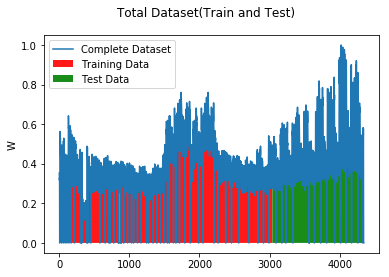

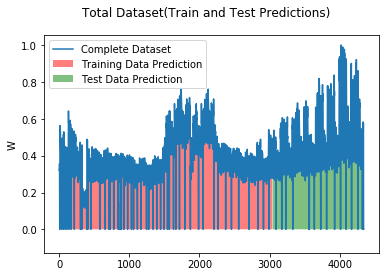

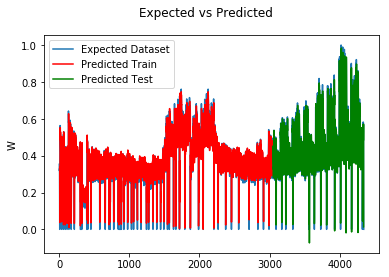

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

# create two subplots with the shared x and y axes
fig, ax1 = plt.subplots(1, 1)


ax1.plot(x2d, dataset,label='Complete Dataset')
ax1.fill_between(x, 0, y, facecolor='red', alpha=0.9, label ='Training Data')
ax1.fill_between(xTest, 0, yTest, facecolor='green', alpha=0.9, label ='Test Data')
ax1.legend()

ax1.set_ylabel('W')
fig.suptitle('Total Dataset(Train and Test)')

fig2, ax2 = plt.subplots(1,1)

ax2.plot(x2d, dataset,label='Complete Dataset')
ax2.fill_between(xPred, 0, predicted, facecolor='red', alpha=0.5, label ='Training Data Prediction')
ax2.fill_between(xPredTest, 0, predictedTest, facecolor='green', alpha=0.5, label ='Test Data Prediction')
ax2.legend()

ax2.set_ylabel('W')
fig2.suptitle('Total Dataset(Train and Test Predictions)')

fig3, ax3 = plt.subplots(1, 1)

ax3.plot(x2d, dataset,label='Expected Dataset')
ax3.plot(xPred, predicted,color ='red', label='Predicted Train')
ax3.plot(xPredTest, predictedTest,color='green', label ='Predicted Test')
ax3.legend()

ax3.set_ylabel('W')
fig3.suptitle('Expected vs Predicted')


In [0]:
#print("Expected=%f, Predicted=%f", % (dataset[xPred:len(predicted)+xPred],dataset[xPredTest:len(predictedTest)+xPredTest]))